In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

In [4]:
#https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [2]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

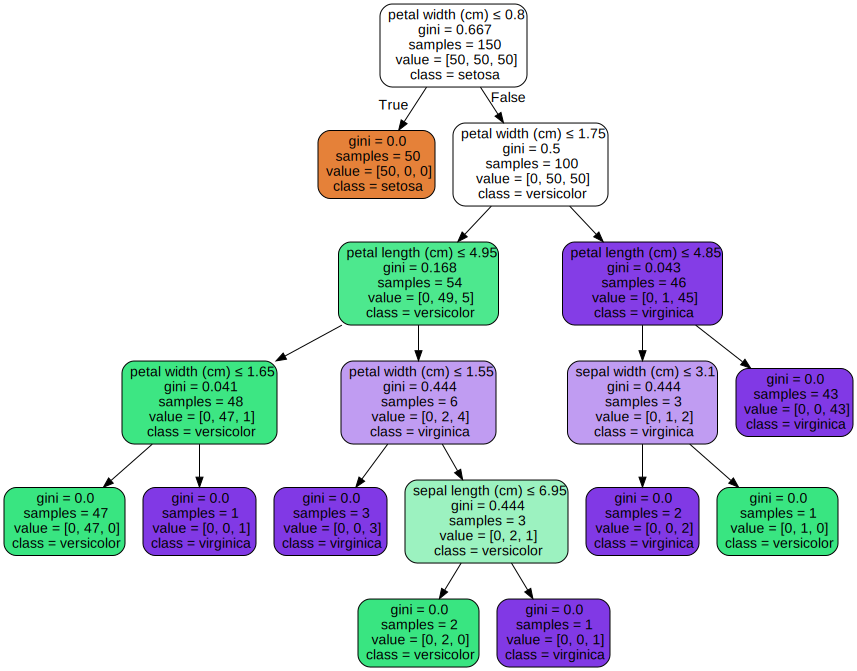

In [6]:
#visualize
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [7]:
#averaging algorithm based on randomized decision trees
from sklearn.ensemble import RandomForestClassifier

In [16]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [17]:
from sklearn.model_selection import train_test_split
x = data[['sepal length','sepal width', 'petal length', 'petal width']]
y = data['species']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [18]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
y_pred = rf_clf.predict(x_test)

In [20]:
print(y_pred)

[0 1 1 1 2 2 2 0 1 2 1 0 0 2 1 1 2 1 2 1 1 1 1 1 1 2 1 2 2 0]


In [27]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9666666666666667


In [32]:
#predict a flower with sepal length 3, sepal width 5,
#petal length 4, petal width 2
rf_clf.predict([[2,2,2,2]])

array([0])